In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


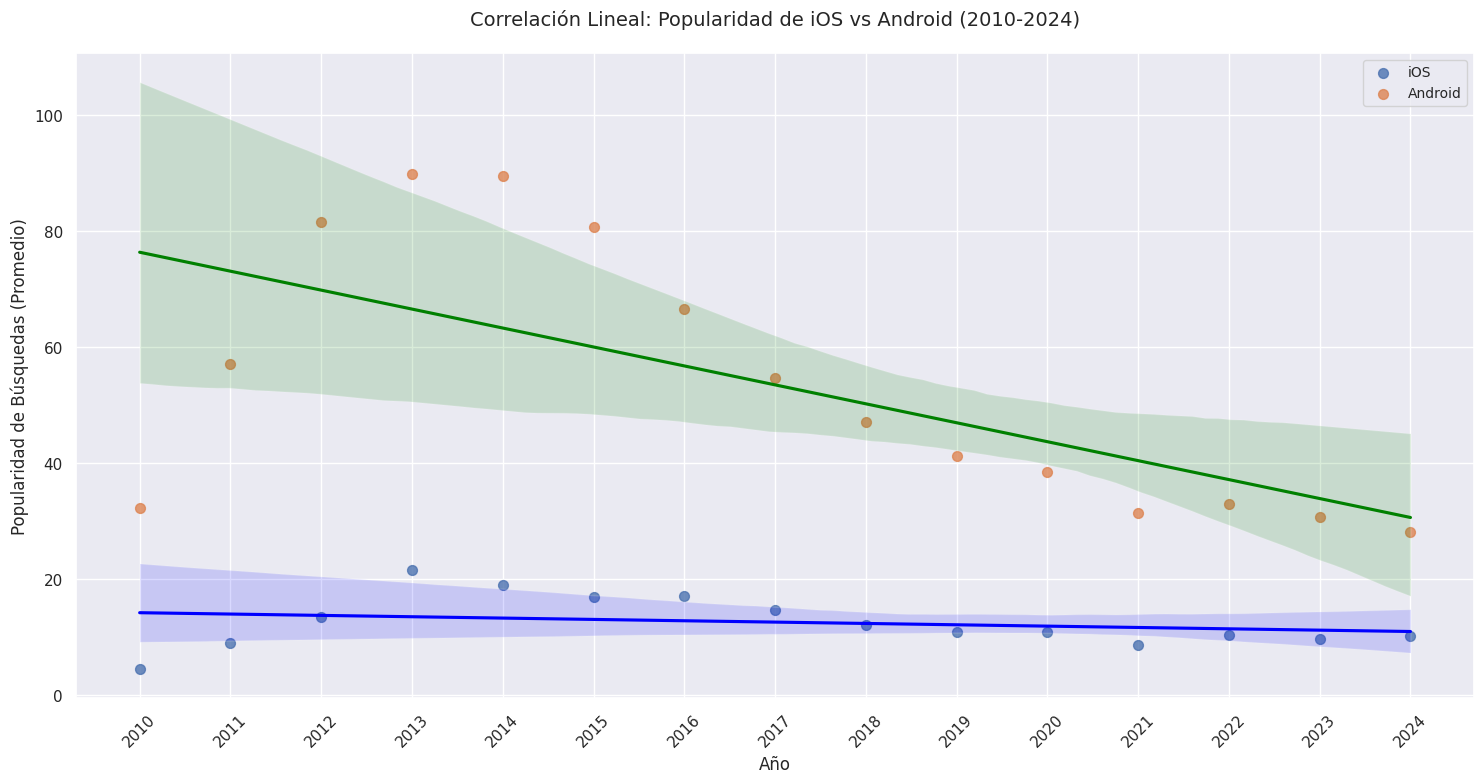


Correlación entre iOS y Android: 0.85


In [2]:

# Configurar el estilo de Seaborn
sns.set_theme(style="darkgrid")

# Cargar el archivo Excel
data_excel = pd.read_excel('/content/graficos/multiTimeline-_4__1.xlsx')

# Convertir la columna 'Mes' a datetime
data_excel['Mes'] = pd.to_datetime(data_excel['Mes'])

# Crear una nueva columna 'Año' extraída de la columna 'Mes'
data_excel['Año'] = data_excel['Mes'].dt.year

# Agrupar los datos por año y calcular la media para cada sistema operativo
data_excel_grouped = data_excel.groupby('Año').mean().reset_index()

# Crear el gráfico de correlación lineal
plt.figure(figsize=(15, 8))

# Regresión para iOS
sns.regplot(
    x=data_excel_grouped['Año'],
    y=data_excel_grouped['ios: (Todo el mundo)'],
    label='iOS',
    scatter_kws={'s': 50},  # Tamaño de los puntos
    line_kws={'color': 'blue'},  # Color de la línea de regresión
)

# Regresión para Android
sns.regplot(
    x=data_excel_grouped['Año'],
    y=data_excel_grouped['android: (Todo el mundo)'],
    label='Android',
    scatter_kws={'s': 50},
    line_kws={'color': 'green'},  # Color de la línea de regresión
)

# Configuración del gráfico
plt.title('Correlación Lineal: Popularidad de iOS vs Android (2010-2024)', fontsize=14, pad=20)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Popularidad de Búsquedas (Promedio)', fontsize=12)
plt.legend(fontsize=10)
plt.xticks(data_excel_grouped['Año'], rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Calcular la correlación entre iOS y Android
correlation = data_excel_grouped['ios: (Todo el mundo)'].corr(
    data_excel_grouped['android: (Todo el mundo)']
)
print(f"\nCorrelación entre iOS y Android: {correlation:.2f}")
